#Introduction

The dataset contains information about the company’s clients and we're asked to help segment them into different groups in order to apply different business strategies for each type of customer.

For instance, the company could provide higher credit limits for customers that use the card a lot, but spend little money, or even create incentives for those with high income who don't use the card as much as the company expects. In order to apply different strategies, the company needs different groups of customers.

# Data Dictionary

`customer_id:` unique identifier for each customer.
age: customer age in years.

`gender:` customer gender (M or F).

`dependent_count:` number of dependents of each customer.

`education_level: `level of education ("High School", "Graduate", etc.).

`marital_status: `marital status ("Single", "Married", etc.).

`estimated_income`: the estimated income for the customer projected by the data science team.

months_on_book: time as a customer in months.

`total_relationship_count:` number of times the customer contacted the company.

`months_inactive_12_mon:` number of months the customer did not use the credit card in the last 12 months.

`credit_limit:` customer's credit limit.

`total_trans_amount:` the overall amount of money spent on the card by the customer.

`total_trans_count:` the overall number of times the customer used the card.

`avg_utilization_ratio: `daily average utilization ratio

#Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
customer = pd.read_csv('customer_segmentation.csv')

#Questions:

How big is the dataset?

How many columns does it have?

Do we see any particular column that doesn't use the analysis?


What's the type of data contained in each column?

Are there many categorical variables?

How are we dealing with them?

Are there any missing values?

Look at the correlation between the columns and explain what we see.
Plot the distribution of each numeric column and comment on the results.

In [9]:
print("Data size: ",customer.shape)
print("\nColumns missing values?", customer.info())

Data size:  (10127, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-n

## Mapping categorical columns

1- Replace the values in the `gender` column with 1 for "M" and 0 for "F"

2- Replace the values in the `education_level` column in the order below.

    Uneducated - 0

    High School - 1

    College - 2

    Graduate - 3

    Post-Graduate - 4

    Doctorate - 5

3 - Use the pandas.get_dummies() in the `marital_status`. drop this column

In [37]:
customer_mod = customer.copy()
# Mapping gender column
customer_mod['gender'] = customer_mod['gender'].map({'M': 1, 'F': 0})

# Mapping education_level column
education_mapping = {
    'Uneducated': 0,
    'High School': 1,
    'College': 2,
    'Graduate': 3,
    'Post-Graduate': 4,
    'Doctorate': 5
}
customer_mod['education_level'] = customer_mod['education_level'].map(education_mapping)


#Creating dummies of marital status, drop first column
customer_mod = pd.get_dummies(data=customer_mod, columns=["marital_status"], drop_first=True)

#removing customer_id from the dataset:
customer_no_id = customer_mod.drop('customer_id',axis=1)

customer_no_id.head()


,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,True,False,False
1,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,False,True,False
2,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,True,False,False
3,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,False,False,True
4,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,True,False,False


## Correlations among columns

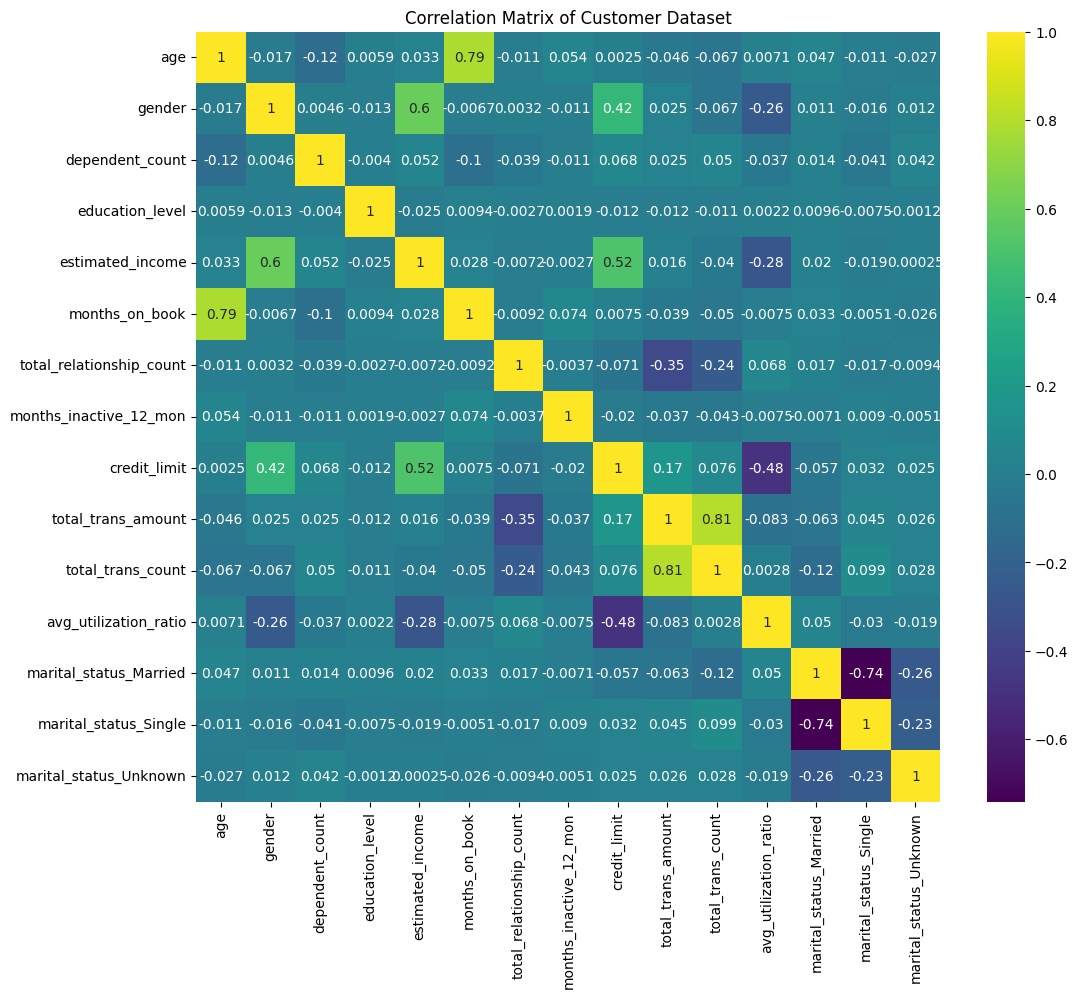

In [38]:
# prompt: gere um uma matriz de correlação com seaborn usando dataset customer

plt.figure(figsize=(12, 10))
sns.heatmap(customer_no_id.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix of Customer Dataset')
plt.show()


# Columns distributions


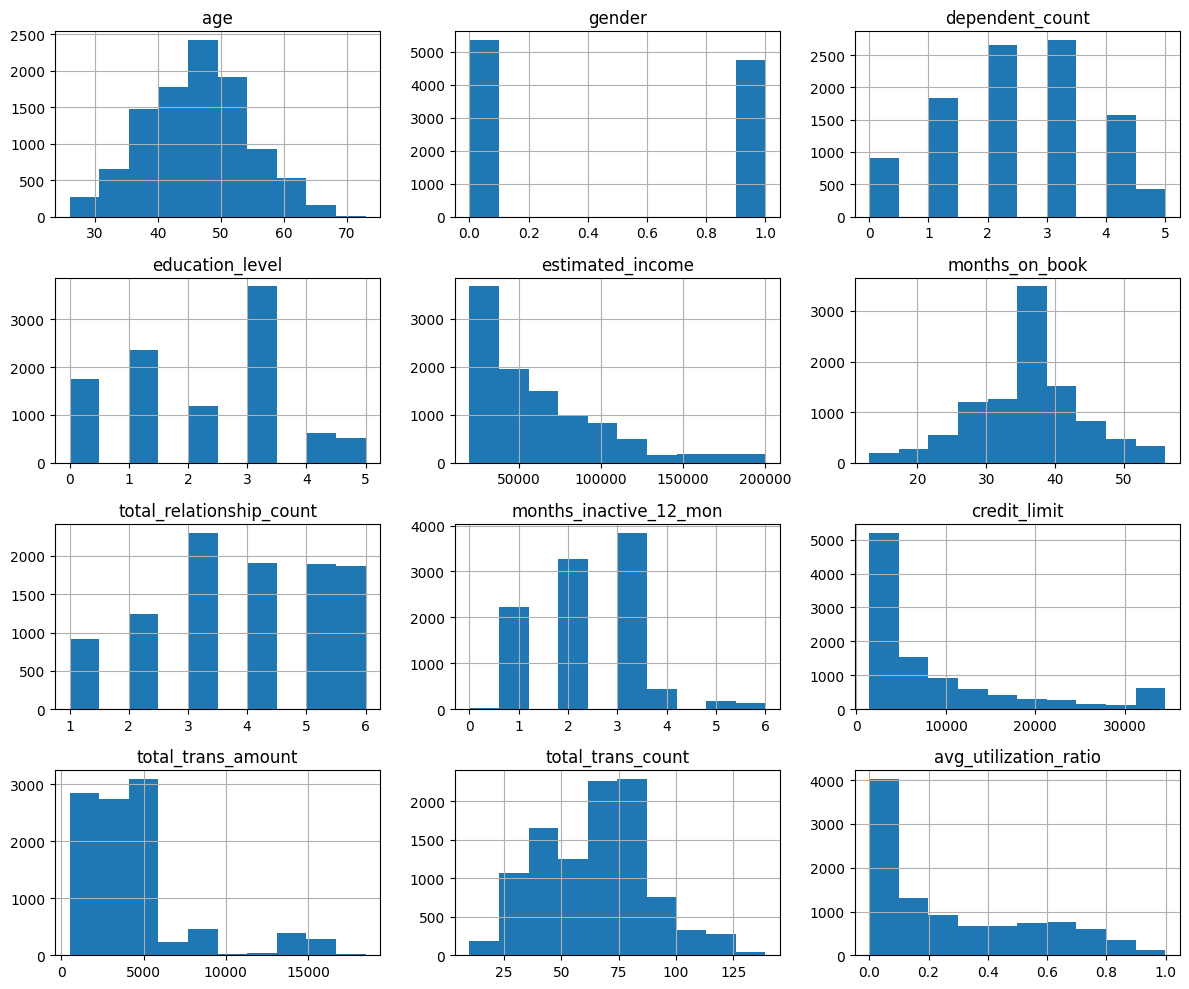

In [39]:
categorical_features = ['gender', 'education_level', 'marital_status']

customer_no_id.hist(figsize=(12, 10))

plt.tight_layout()
plt.show()

#Scaling data

Note that we have different scaled data across the DataFrame. The `estimated_income`, for instance, contains numbers in the range of dozens and hundreds of thousands, while the `dependent_count` column contains numbers from 1 to 5.

In [45]:
# Select columns for scaling
cols_to_scale = ['estimated_income', 'dependent_count']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
customer_no_id = pd.DataFrame(scaler.fit_transform(customer_no_id))

# Display the scaled data
print(customer_no_id.head())


         0         1         2         3         4         5         6   \
0 -0.165406  1.059956  0.503368 -0.752211  0.175810  0.384621  0.763943   
1  0.333570 -0.943436  2.043199  0.662787 -0.967166  1.010715  1.407306   
2  0.583058  1.059956  0.503368  0.662787  0.785397  0.008965  0.120579   
3 -0.789126 -0.943436  1.273283 -0.752211 -0.636973 -0.241473 -0.522785   
4 -0.789126  1.059956  0.503368 -1.459710  0.074212 -1.869317  0.763943   

         7         8         9         10        11        12        13  \
0 -1.327136  0.446622 -0.959707 -0.973895 -0.775882  1.077338 -0.798507   
1 -1.327136 -0.041367 -0.916433 -1.357340 -0.616276 -0.928214  1.252337   
2 -1.327136 -0.573698 -0.740982 -1.911206 -0.997155  1.077338 -0.798507   
3  1.641478 -0.585251 -0.951758 -1.911206  1.759686 -0.928214 -0.798507   
4 -1.327136 -0.430877 -1.056263 -1.570365 -0.997155  1.077338 -0.798507   

         14  
0 -0.282609  
1 -0.282609  
2 -0.282609  
3  3.538459  
4 -0.282609  


# Choosing K

We'll have to create several models and compute the **inertia** from each of them. Then, we'll be able to plot the **Elbow Curve** and decide the number of clusters we'll use to segment the customers.

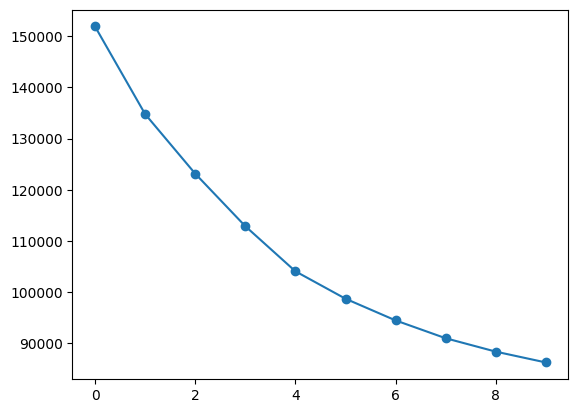

[151904.99999999997, 134790.42791825827, 123153.57162426073, 112890.11872307569, 104079.98121884833, 98723.33880774415, 94486.36195949624, 91002.59748639807, 88386.13197022505, 86271.91127239921]


In [46]:
def plot_elbow_curve(df,max_clusters=10):
    inertias = []
    #It loops from one to max_clusters
    for i in range(1,max_clusters+1):

        #It instantiates a KMeans object with a new n_clusters value.
        model = KMeans(n_clusters = i,n_init=10)
        cluster = model.fit_predict(df)

        #it appends model.inertia_ to the inertias list.
        inertias.append(model.inertia_)

    #After, the loop, use the inertias list to plot the Elbow Curve.
    plt.plot(range(max_clusters),inertias,marker='o')
    plt.show()

    return inertias

#Call the function for the same two variables of the DataFrame. Assign the result back to inertias and print it.
inertias = plot_elbow_curve(customer_no_id)
print(inertias)

As the number of clusters increased from 1 to 10, the inertia decreased consistently. The most significant drop occurred between 1 and 2 clusters, going from approximately 151,905 to 134,791. The rate of decrease becomes less pronounced after about 5 clusters. Hence, we'll proceed with **6 clusters.**



In [48]:
#Creating KMeans, k=6
model = KMeans(n_clusters=6)
clusters = model.fit_predict(customer_no_id)

print(clusters)
print("Number of iterations:",model.n_iter_)
print("Inertia:",model.inertia_)
print("The coordinates of the final centroids:",model.cluster_centers_)
print("Number of features passed to the model:", model.n_features_in_)


[2 1 2 ... 4 5 4]
Number of iterations: 27
Inertia: 99053.06313814259
The coordinates of the final centroids: [[-1.48977838e-01  3.60699139e-01 -2.17239810e-02 -2.50172570e-02
   1.95851989e-01 -1.14645469e-01 -1.04973646e+00 -1.59608199e-01
   7.32990460e-01  2.58473980e+00  1.76245112e+00 -3.99958560e-01
   8.74457171e-02 -2.99891983e-02 -1.96696206e-01]
 [-6.73963337e-02 -6.54863398e-01 -1.17336155e-01 -5.18355765e-03
  -5.70996377e-01 -5.61864238e-02  5.54283094e-02  4.50868279e-02
  -4.96610774e-01 -1.77217804e-01  4.41807330e-02  3.55697765e-01
  -9.28213813e-01  1.21115939e+00 -2.82608874e-01]
 [ 6.08712971e-03  9.97714364e-01  2.04892277e-02 -1.13978180e-02
   7.22021470e-01 -1.40125270e-02  2.22080582e-01  5.85826527e-03
   2.30890042e-01 -4.63555869e-01 -5.37793487e-01 -2.24785225e-01
   9.21566973e-01 -7.98506854e-01 -2.82608874e-01]
 [ 5.01992366e-02  9.62493366e-01  6.06668451e-02 -3.70634509e-02
   8.81331263e-01  5.97288865e-02  1.17536114e-01 -1.19863966e-02
   8.449676

# Analyzing Results


1- Create a new column called CLUSTER in the original customers DataFrame. This column should contain the cluster assigned to each customer by the algorithm.

2- Group each numeric variable by the CLUSTER column and plot a bar chart. Analyze the clusters' characteristics regarding each variable. Explain the conclusions.

3 - Create a scatter plot with different colors for each cluster of pairs of variables with a high correlation. Use seaborn.scatterplot() function with the hue parameter.

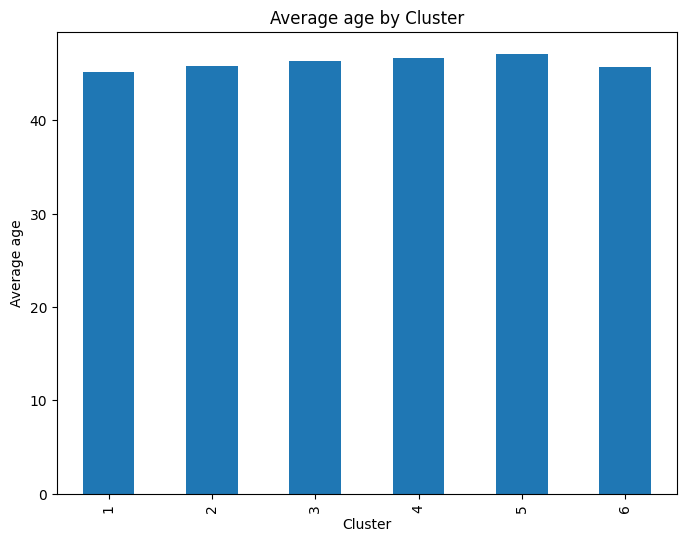

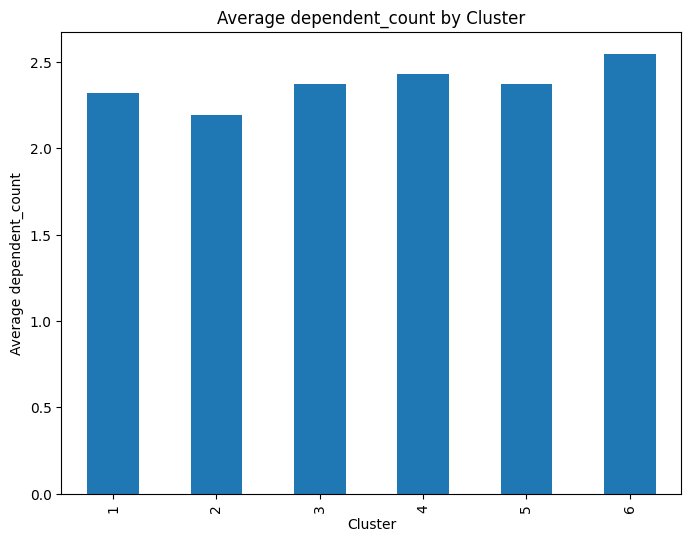

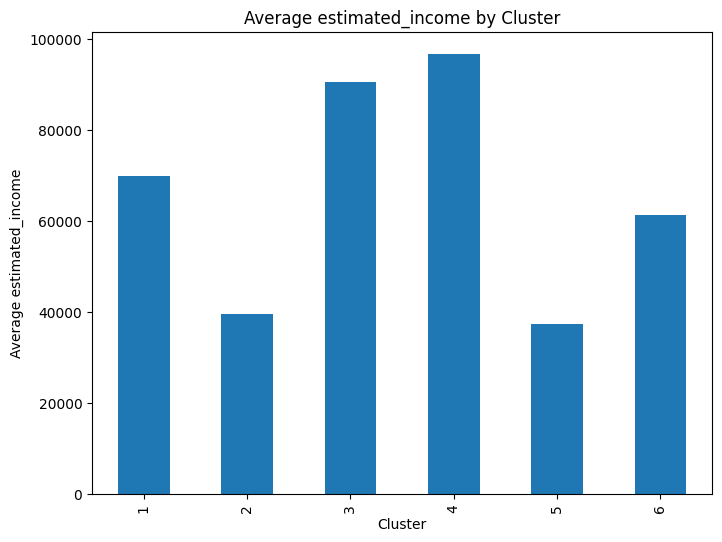

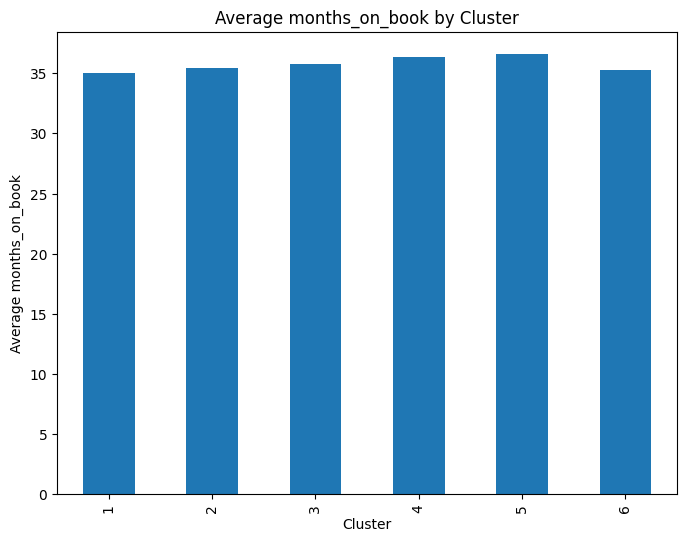

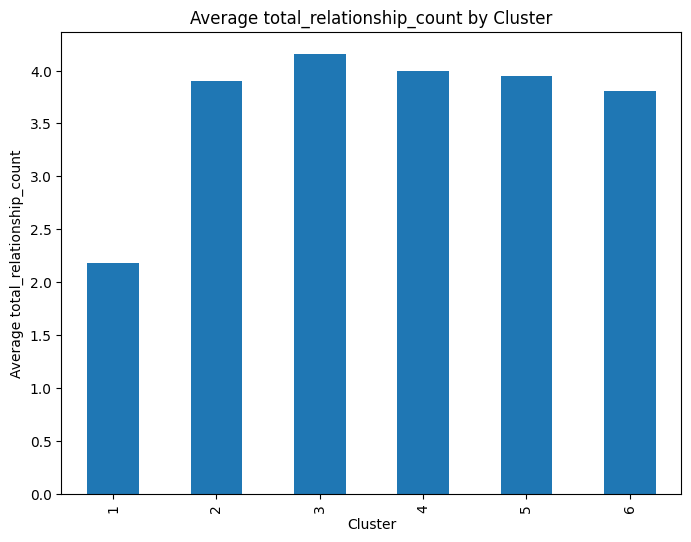

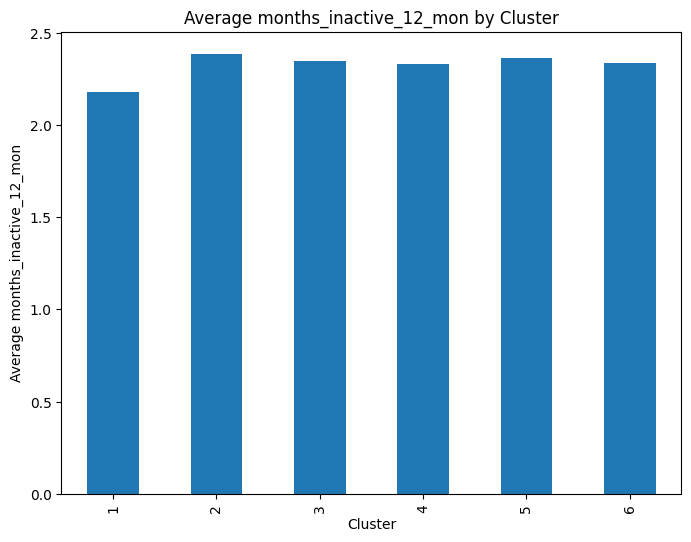

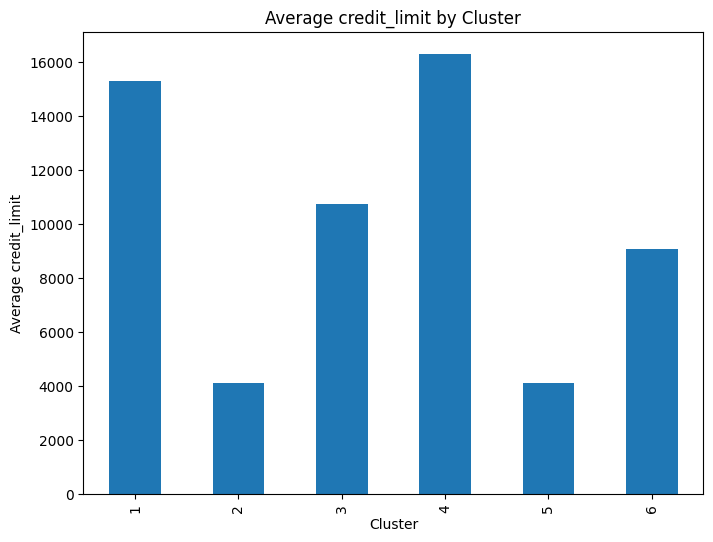

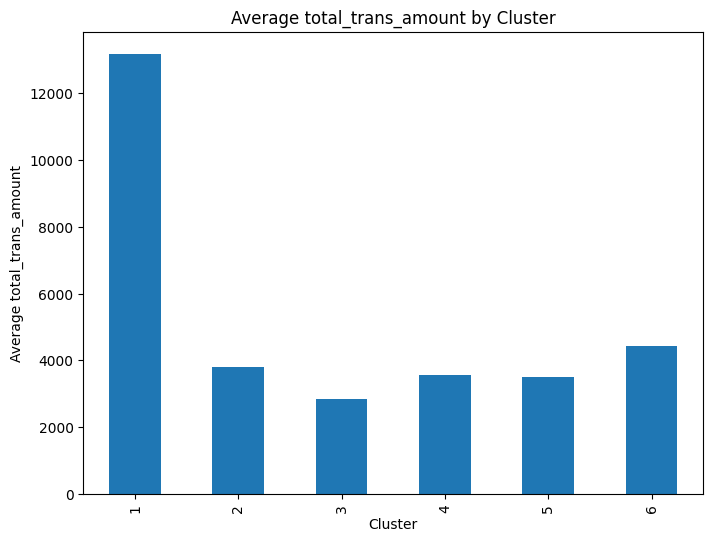

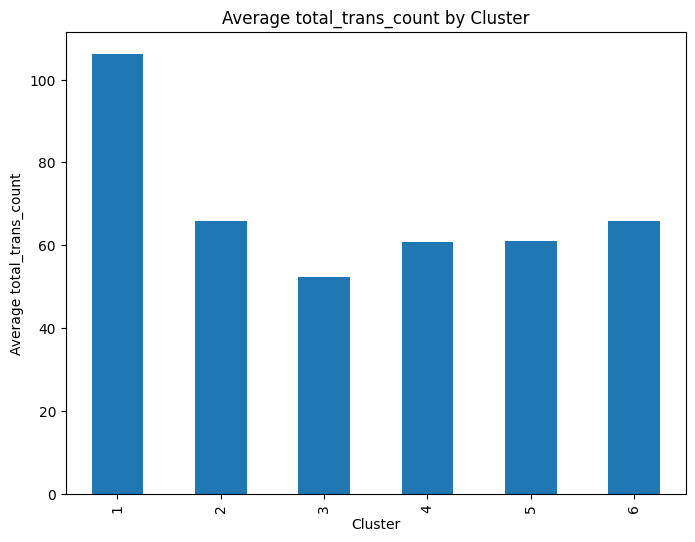

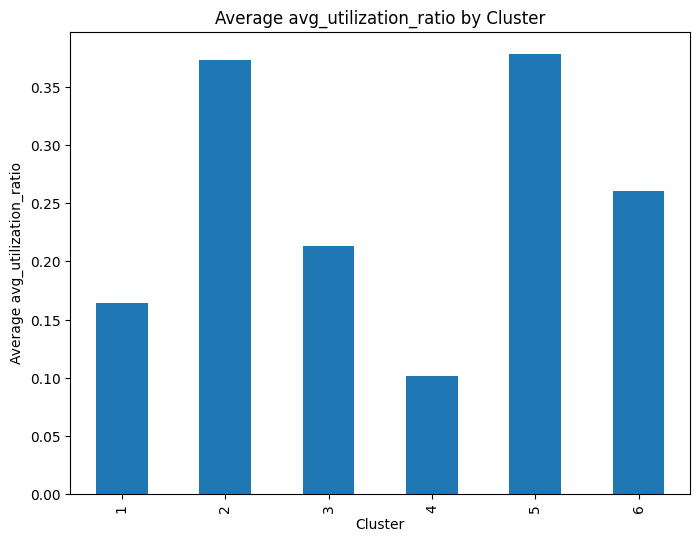

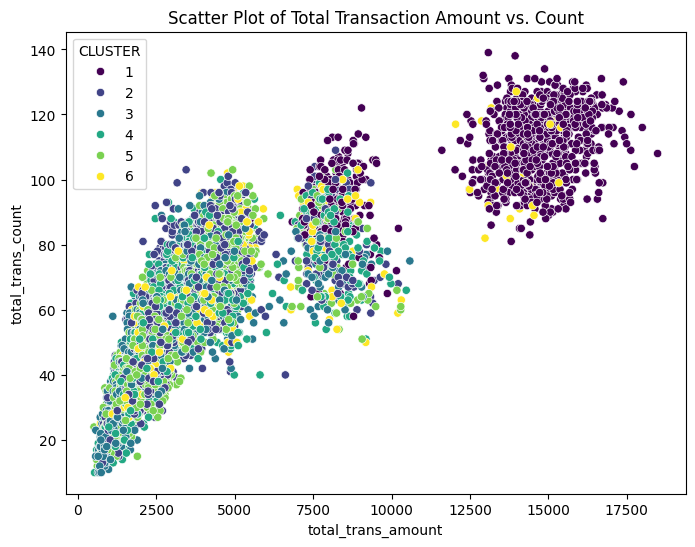

In [51]:
# prompt: agrupe customer_no_id por cluster

import pandas as pd

# Assuming 'customer_mod' and 'clusters' are defined from the previous code

# 1. Create a new column 'CLUSTER' in the original DataFrame
customer_mod['CLUSTER'] = clusters+1

# 2. Group numeric variables by cluster and plot bar charts
numeric_cols = ['age', 'dependent_count', 'estimated_income',
                'months_on_book', 'total_relationship_count',
                'months_inactive_12_mon', 'credit_limit',
                'total_trans_amount', 'total_trans_count',
                'avg_utilization_ratio']

for col in numeric_cols:
    grouped = customer_mod.groupby('CLUSTER')[col].mean() # or other aggregation like sum, median
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    grouped.plot(kind='bar')
    plt.title(f'Average {col} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average {col}')
    plt.show()


# 3. Create scatter plots for highly correlated pairs
# Example using 'total_trans_amount' and 'total_trans_count' (replace with other pairs as needed)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_trans_amount', y='total_trans_count', hue='CLUSTER', data=customer_mod, palette='viridis')
plt.title('Scatter Plot of Total Transaction Amount vs. Count')
plt.show()


In [32]:
customer_no_id['clusters'] = clusters


customer_no_id.head()

#Group Numerical Variables in plot bar chart
numerical_columns = ["", ]

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown,clusters
0,45,1,0.503368,1,0.175810,39,5,1,12691.0,1144,42,0.061,True,False,False,1
1,49,0,2.043199,3,-0.967166,44,6,1,8256.0,1291,33,0.105,False,True,False,1
2,51,1,0.503368,3,0.785397,36,4,1,3418.0,1887,20,0.000,True,False,False,1
3,40,0,1.273283,1,-0.636973,34,3,4,3313.0,1171,20,0.760,False,False,True,1
4,40,1,0.503368,0,0.074212,21,5,1,4716.0,816,28,0.000,True,False,False,1
